In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [10]:
book = pd.read_csv("book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [6]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [11]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 2000):
    trans.append([str(book.values[i,j]) for j in range(0, 11)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(2000, 11)


In [13]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(2000, 2)

In [16]:
data_a = data.loc[:, ]
data_a

,0,1
0,True,True
1,True,True
2,True,False
3,True,True
4,True,True
...,...,...
1995,True,True
1996,True,False
1997,True,False
1998,True,True


In [17]:
# checking the shape
data_a.shape

(2000, 2)

In [8]:
#Now, let us return the items and itemsets with at least 5% support:
apriori(book, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
589,0.0125,"(ItalArt, ItalCook, ItalAtlas, ArtBks, RefBks,..."
590,0.0145,"(DoItYBks, ChildBks, GeogBks, ArtBks, RefBks, ..."
591,0.0105,"(DoItYBks, ItalArt, ItalCook, ChildBks, GeogBk..."
592,0.0100,"(ItalArt, ItalCook, ChildBks, GeogBks, ArtBks,..."


In [9]:
frequent_itemsets = apriori(book, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
95,0.0600,"(DoItYBks, GeogBks, CookBks, YouthBks)",4
96,0.0560,"(ArtBks, GeogBks, CookBks, YouthBks)",4
97,0.0650,"(DoItYBks, GeogBks, CookBks, ArtBks)",4
98,0.0510,"(DoItYBks, ChildBks, GeogBks, CookBks, YouthBks)",5


In [53]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.05)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347


# getting th item sets with length = 1,2,3,4 and support more han 50%

In [49]:

a=frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.05) ]
a

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1


In [51]:
b=frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]
b

,support,itemsets,length
9,0.1650,"(ChildBks, YouthBks)",2
10,0.2560,"(ChildBks, CookBks)",2
11,0.1840,"(DoItYBks, ChildBks)",2
12,0.1515,"(RefBks, ChildBks)",2
13,0.1625,"(ChildBks, ArtBks)",2
14,0.1950,"(ChildBks, GeogBks)",2
15,0.0850,"(ItalCook, ChildBks)",2
16,0.1620,"(CookBks, YouthBks)",2
17,0.1155,"(DoItYBks, YouthBks)",2
18,0.0965,"(RefBks, YouthBks)",2


In [45]:
c=frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.05) ]
c

,support,itemsets,length
36,0.1290,"(ChildBks, CookBks, YouthBks)",3
37,0.0950,"(DoItYBks, ChildBks, YouthBks)",3
38,0.0830,"(RefBks, ChildBks, YouthBks)",3
39,0.0805,"(ArtBks, ChildBks, YouthBks)",3
40,0.0990,"(ChildBks, GeogBks, YouthBks)",3
41,0.1460,"(DoItYBks, ChildBks, CookBks)",3
42,0.1225,"(RefBks, ChildBks, CookBks)",3
43,0.1265,"(ChildBks, CookBks, ArtBks)",3
44,0.1495,"(ChildBks, GeogBks, CookBks)",3
45,0.0850,"(ItalCook, ChildBks, CookBks)",3


In [47]:
d=frequent_itemsets[ (frequent_itemsets['length'] == 4) &
                   (frequent_itemsets['support'] >= 0.05) ]
d

,support,itemsets,length
76,0.0820,"(DoItYBks, ChildBks, CookBks, YouthBks)",4
77,0.0680,"(RefBks, ChildBks, CookBks, YouthBks)",4
78,0.0670,"(ArtBks, ChildBks, CookBks, YouthBks)",4
79,0.0830,"(ChildBks, GeogBks, CookBks, YouthBks)",4
80,0.0530,"(RefBks, DoItYBks, ChildBks, YouthBks)",4
81,0.0510,"(ArtBks, DoItYBks, ChildBks, YouthBks)",4
82,0.0565,"(DoItYBks, ChildBks, GeogBks, YouthBks)",4
83,0.0515,"(RefBks, ChildBks, GeogBks, YouthBks)",4
84,0.0550,"(ArtBks, ChildBks, GeogBks, YouthBks)",4
85,0.0745,"(RefBks, DoItYBks, ChildBks, CookBks)",4


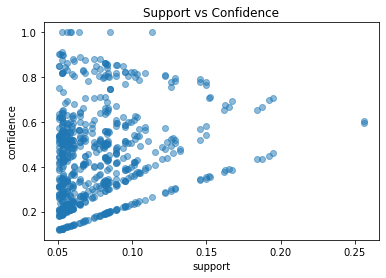

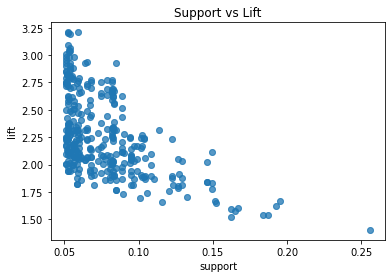

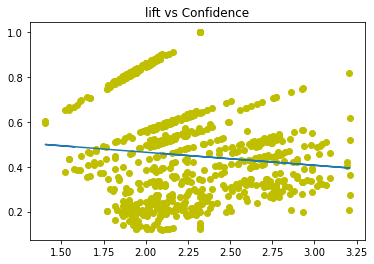

In [39]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()
plt.scatter(rules['support'],rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.title('lift vs Confidence')
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# There are 9  Itemsets with 1 antacidents about 50% support
# There are 27  Itemsets with 2 antacidents about 50% support
# There are 40  Itemsets with 3 antacidents about 50% support
# There are 23  Itemsets with 4 antacidents about 50% support ,with 652 rules